# MNIST 데이터셋 학습
MNIST 데이터셋은0~9까지 총 10개의 label로 이루어진 이미지 분류를 위한 사이즈의 손글씨 데이터셋이다.  
각각의 레이블마다 28×28 크기 이미지인 60,000개의 training 데이터셋, 10,000개의 test 데이터셋이 존재하고, 결과적으로 총 70,000개의 28×28 크기의 이미지로 데이터셋이 구성되어 있다.

In [47]:
import tensorflow.keras.utils as utils
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras import backend

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
from tensorflow.keras.layers import Flatten, BatchNormalization, Dropout, ReLU
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

## (1) 데이터셋

In [49]:
(X_train, Y_train),(X_test, Y_test) = datasets.mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [50]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

Y_train = utils.to_categorical(Y_train)
Y_test = utils.to_categorical(Y_test)

print(X_train.shape, Y_train.shape)

n_in = X_train.shape[1:]
n_out = Y_train.shape[-1]

(60000, 28, 28, 1) (60000, 10)


## (2) 모델링

In [51]:
from tensorflow.keras.layers import Flatten, BatchNormalization, Dropout, ReLU
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_27 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
re_lu_27 (ReLU)              (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_28 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
re_lu_28 (ReLU)              (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 14, 32)       

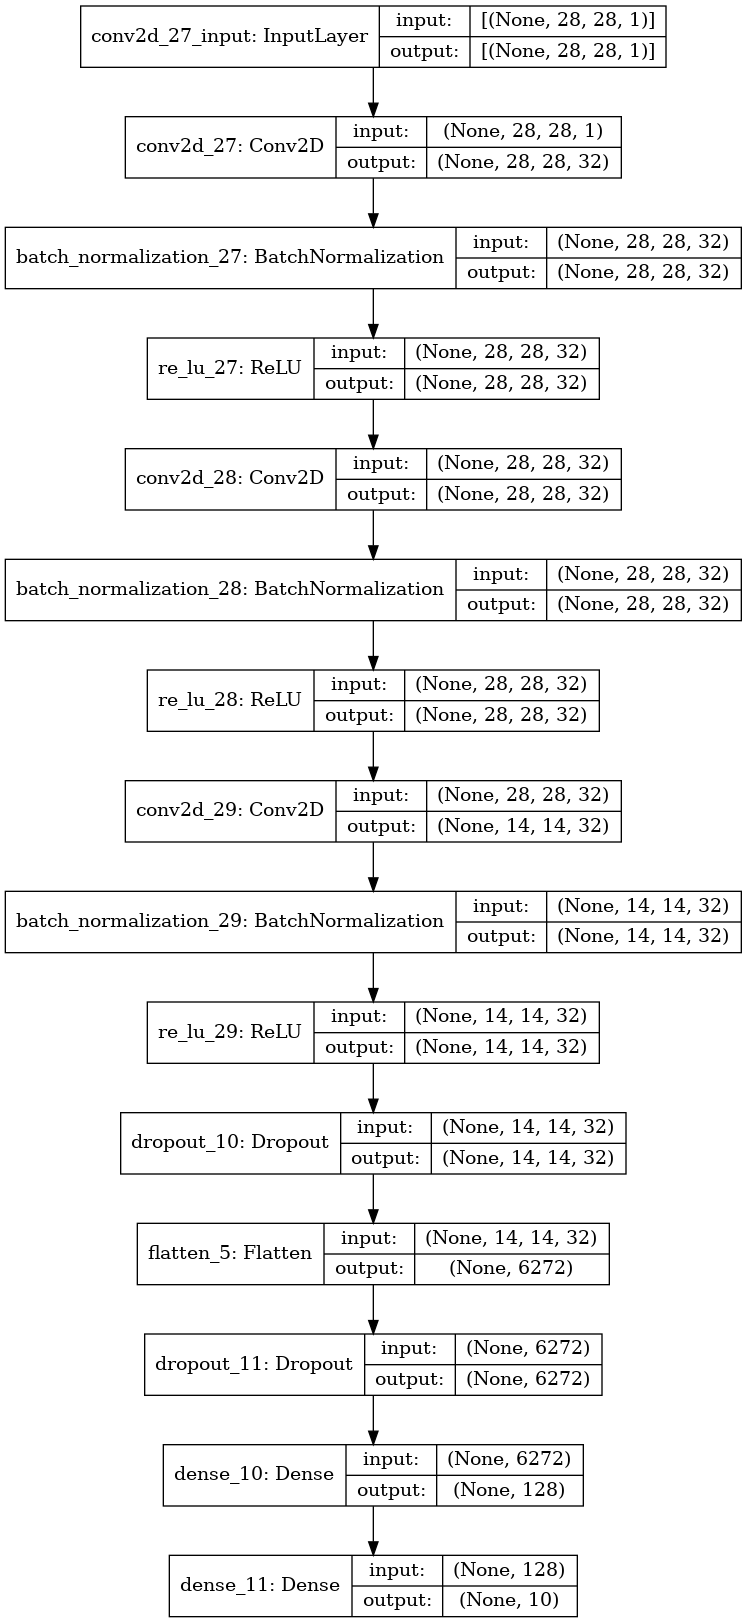

In [71]:
def CNN_BN(n_in, n_out):
    # Coding Time
    # Feature Extraction
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=n_in))
    model.add(BatchNormalization())
    model.add(ReLU())
    
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(ReLU())
     
    model.add(Conv2D(32, (5, 5), padding='same',strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Dropout(0.4))
    
#     model.add(Conv2D(64, (3, 3), padding='same'))
# #     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(BatchNormalization())
#     model.add(ReLU())
    
#     model.add(Conv2D(64, (3, 3), padding='same'))
# #     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(BatchNormalization())
#     model.add(ReLU())
    
#     model.add(Conv2D(64, (3, 3), padding='same',strides=(2, 2)))
#     model.add(BatchNormalization())
#     model.add(ReLU())
    
# #     model.add(Conv2D(64, (3, 3), padding='same',strides=(2, 2)))
# #     model.add(BatchNormalization())
# #     model.add(ReLU())
    
#     model.add(Conv2D(128, (4, 4), padding='same'))
#     model.add(BatchNormalization())
#     model.add(ReLU())    
    
    # Classifier
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(128))
#     model.add(BatchNormalization())
#     model.add(ReLU())
    model.add(Dense(n_out, activation='softmax'))
    return model



model=CNN_BN(n_in, n_out)
model.summary()

from tensorflow.keras.utils import plot_model
%matplotlib inline
plot_model(model, show_shapes=True)

## (3) 모델의 학습과정 설정

In [72]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, decay=1e-6, epsilon=None, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

## (4) 모델 학습시키기

In [73]:
from tensorflow.keras.callbacks import EarlyStopping

# Coding Time
earlystopper = EarlyStopping(monitor='val_accuracy', patience=5, verbose=0, mode='auto')
history = model.fit(X_train, Y_train, batch_size=128, epochs=300, validation_split=0.2)

Epoch 1/300
375/375 [==============================] - 3s 8ms/step - loss: 0.5709 - accuracy: 0.8273 - val_loss: 0.1236 - val_accuracy: 0.9636
Epoch 2/300
375/375 [==============================] - 3s 8ms/step - loss: 0.1646 - accuracy: 0.9492 - val_loss: 0.0827 - val_accuracy: 0.9768
Epoch 3/300
375/375 [==============================] - 3s 8ms/step - loss: 0.1162 - accuracy: 0.9645 - val_loss: 0.0648 - val_accuracy: 0.9812
Epoch 4/300
375/375 [==============================] - 3s 8ms/step - loss: 0.0907 - accuracy: 0.9716 - val_loss: 0.0535 - val_accuracy: 0.9837
Epoch 5/300
375/375 [==============================] - 3s 8ms/step - loss: 0.0777 - accuracy: 0.9760 - val_loss: 0.0569 - val_accuracy: 0.9834
Epoch 6/300
375/375 [==============================] - 3s 8ms/step - loss: 0.0674 - accuracy: 0.9785 - val_loss: 0.0526 - val_accuracy: 0.9853
Epoch 7/300
375/375 [==============================] - 3s 8ms/step - loss: 0.0602 - accuracy: 0.9808 - val_loss: 0.0475 - val_accuracy: 0.9856

## (5) 모델 평가하기

In [67]:
loss_and_accuracy = model.evaluate(X_test, Y_test, batch_size=128)
print('loss : %.4f, accruracy : %.4f'%(loss_and_accuracy[0],loss_and_accuracy[1]))

79/79 [==============================] - 0s 6ms/step - loss: 0.0464 - accuracy: 0.9946
loss : 0.0464, accruracy : 0.9946


## (6) 모델 사용하기

모델 평가 후, 분류 오류가 난 사례들을 확인해보고, 모델과 데이터셋에 대한 평가 및 분석해볼 것

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        2

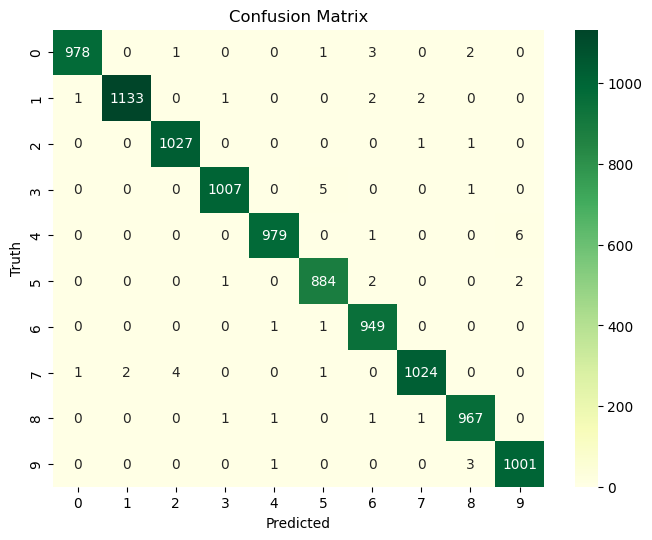

In [38]:
import pandas as pd
import seaborn as sns # 시각화 라이브러리
from sklearn.metrics import confusion_matrix

# Coding Time
#모델의 예상값 리스트 생성
pred_y = model.predict(X_test, verbose=0)
Y_pred = [x.argmax() for x in pred_y]

# 정답 리스트 생성(인덱스)
Y_test_idx = [x.argmax() for x in Y_test]

#matrix 생성
data = {'Real' : Y_test_idx, 'Predict' : Y_pred}
df = pd.DataFrame(data, columns=['Real','Predict'])

#heatmap 생성

our_cmatrix = confusion_matrix(Y_pred, Y_test_idx)
plt.figure(figsize=(8, 6), dpi=99)
sns.heatmap(our_cmatrix, annot=True, fmt='g', cmap='YlGn').set(xlabel='Predicted'
                                                               , ylabel='Truth')
plt.title('Confusion Matrix')
plt.show()


# conf_mat = pd.crosstab(df['Real'], df['Predict'], rownames=['Real'], colnames=['Predict'])
# print(conf_mat)

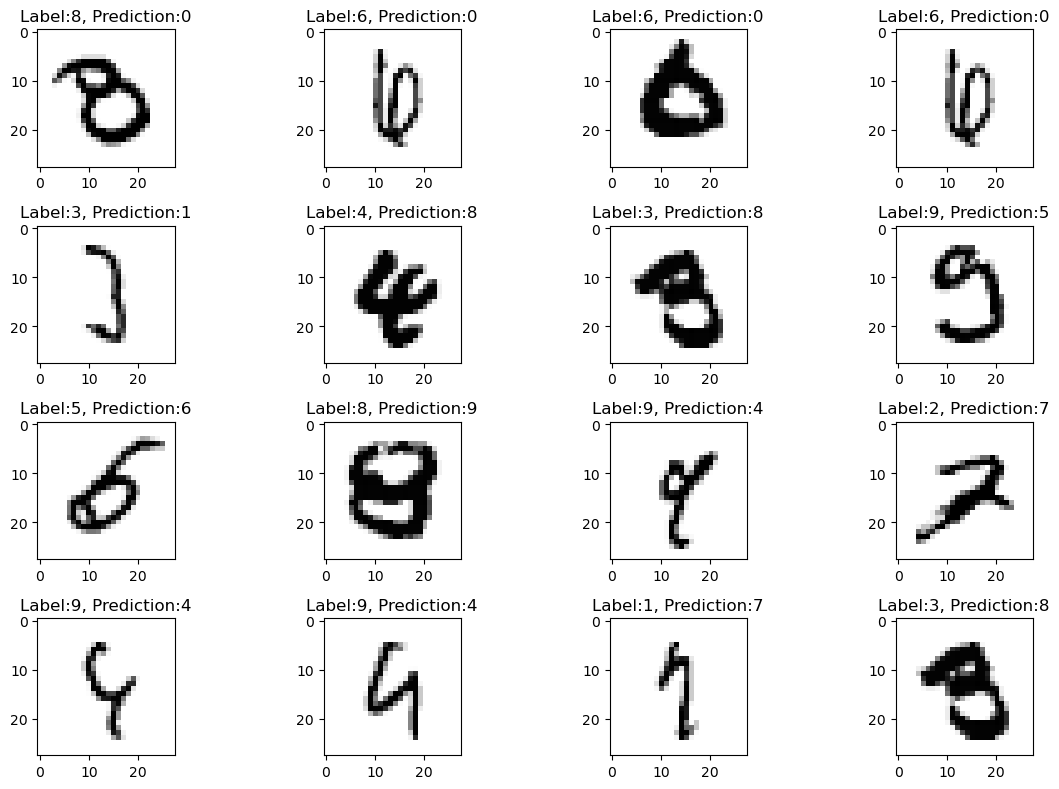

In [46]:
import random

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(Y_test, axis=1)

wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

samples = random.choices(population=wrong_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(X_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + 
    ",Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()